# Apply three different Algorithm:
 1. Reverse-cuthill-Mckee
 2. Fiedler vector
 3. Customized Algorithm
    

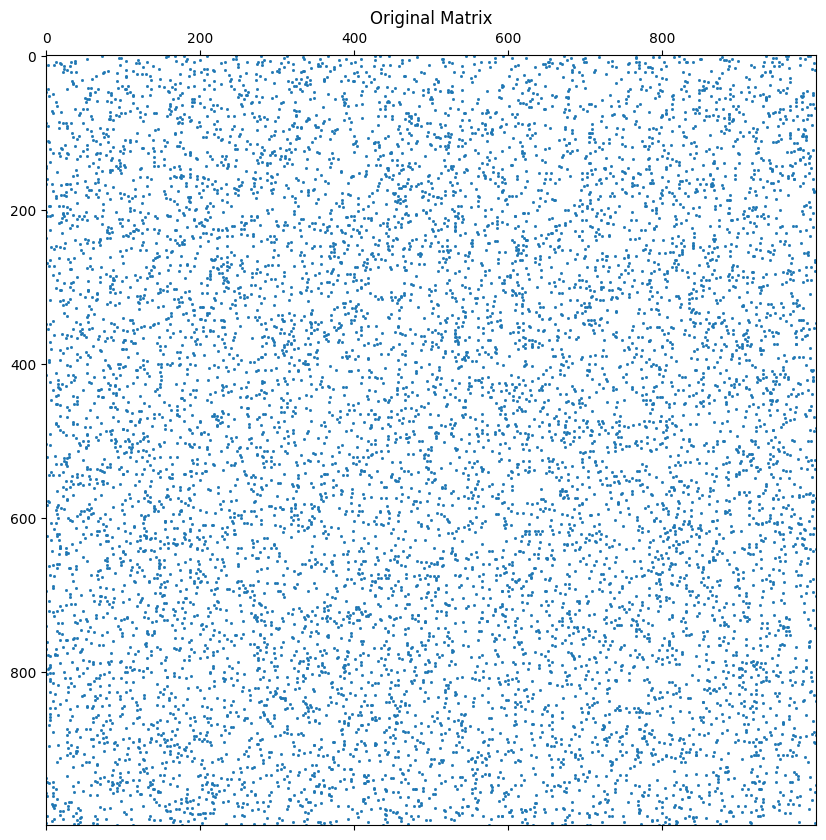

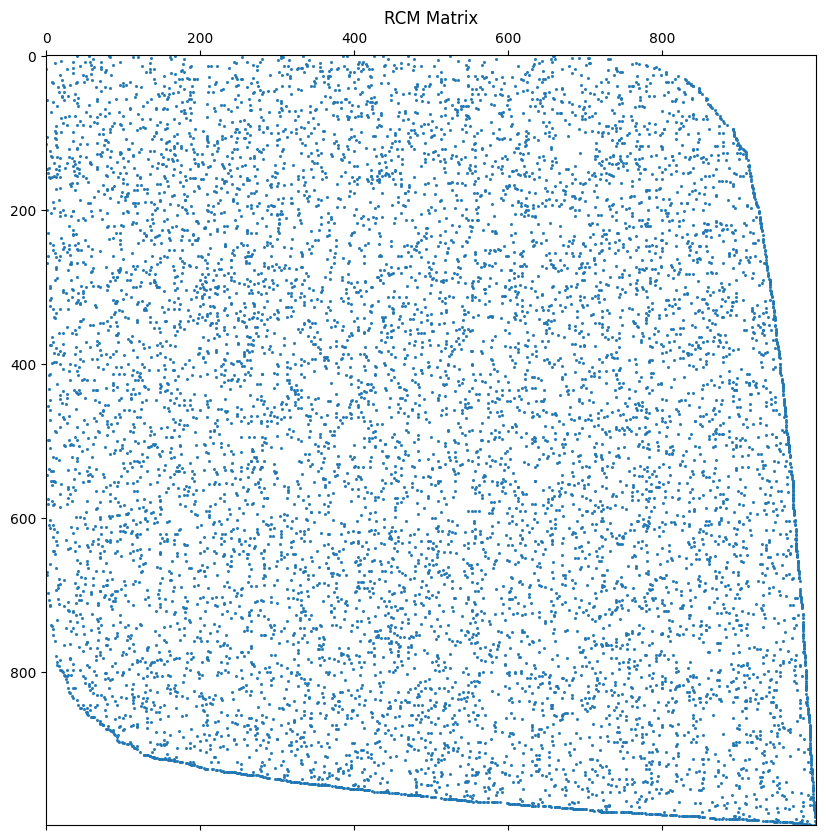

In [8]:
# Cuthill-Mckee
import numpy as np
import scipy.sparse as sp
import networkx as nx
from scipy.sparse.csgraph import reverse_cuthill_mckee
import matplotlib.pyplot as plt


def generate_sparse_matrix(size, density):
    return sp.random(size, size, density=density, format='csr', dtype=np.int8)

def apply_reverse_cuthill_mckee(matrix):
   
    return reverse_cuthill_mckee(matrix, symmetric_mode=False)

# Visualize the matrix using a heatmap.
def visualize_matrix(matrix, title="Matrix"):

    plt.figure(figsize=(10, 10))
    plt.spy(matrix, markersize=1)
    plt.title(title)
    plt.show()

# Generate a large sparse random adjacency matrix
size = 1000  # size of the matrix
density = 0.01  # density of the matrix
sparse_matrix = generate_sparse_matrix(size, density)

# Visualize the original matrix
visualize_matrix(sparse_matrix, title="Original Matrix")

# Apply Reverse Cuthill-McKee algorithm
rcm_ordering = apply_reverse_cuthill_mckee(sparse_matrix)
rcm_matrix = sparse_matrix[rcm_ordering, :][:, rcm_ordering]

# Visualize the RCM matrix
visualize_matrix(rcm_matrix, title="RCM Matrix")

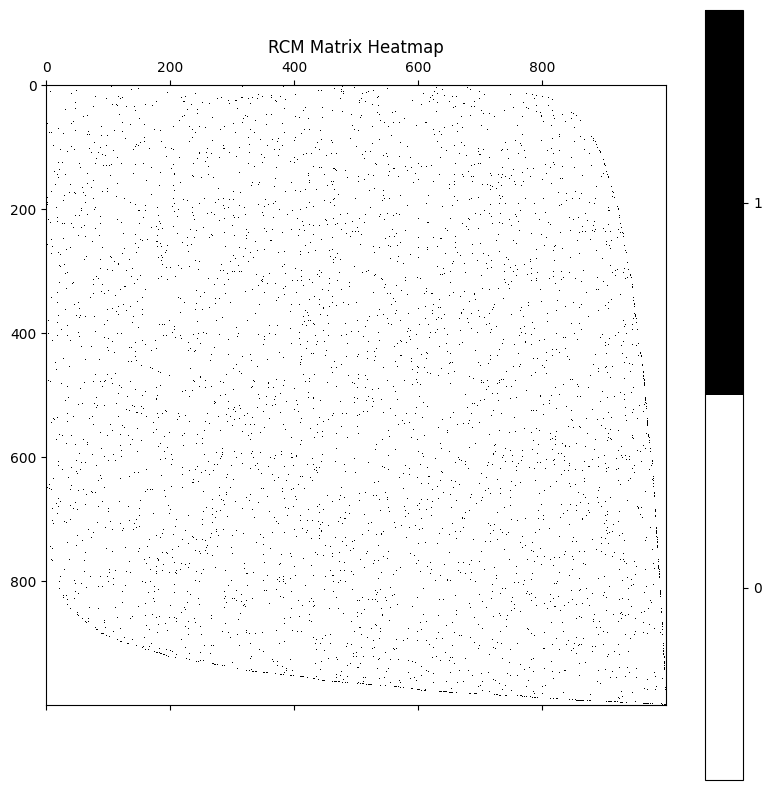

In [13]:
def visualize_matrix_heatmap(matrix, title="Matrix Heatmap"):
    """
    Visualize the matrix using a heatmap.
    """
    plt.figure(figsize=(10, 10))
    # plt.matshow(matrix.toarray(), cmap='viridis', aspect='auto')
    # plt.imshow(matrix.toarray(), cmap='viridis', aspect='auto')
    # plt.spy(matrix.toarray(), cmap='viridis',  aspect='auto')
    plt.spy(matrix.toarray())
    plt.colorbar()
    plt.title(title)
    plt.show()

# Visualize the RCM matrix as a heatmap
visualize_matrix_heatmap(rcm_matrix, title="RCM Matrix Heatmap")


In [9]:
# First, let's recreate the RCM matrix as it was not stored in the previous code execution.

# Re-generate the sparse matrix
sparse_matrix = generate_sparse_matrix(size, density)

# Apply Reverse Cuthill-McKee algorithm
rcm_ordering = apply_reverse_cuthill_mckee(sparse_matrix)
rcm_matrix = sparse_matrix[rcm_ordering, :][:, rcm_ordering]

# Now, visualize the RCM matrix as a heatmap
visualize_matrix_heatmap(rcm_matrix, title="RCM Matrix Heatmap")


NameError: name 'visualize_matrix_heatmap' is not defined

## Fiedler_vector

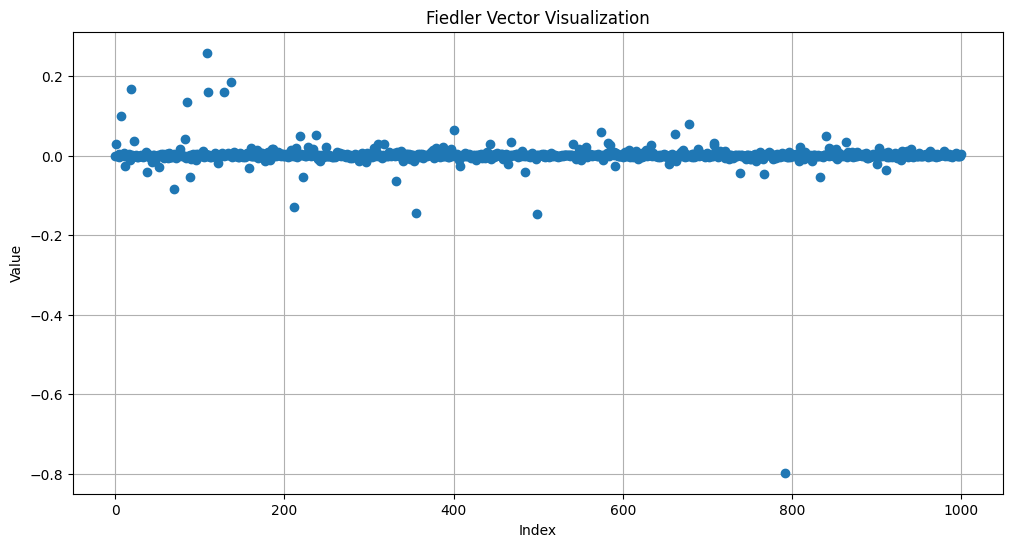

In [6]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as splinalg
import matplotlib.pyplot as plt

def generate_sparse_matrix(size, density):

    return sp.random(size, size, density=density, format='csr', dtype=float)

def compute_fiedler_vector(matrix):
    # Compute the Laplacian matrix
    laplacian = sp.csgraph.laplacian(matrix, normed=False)
    
    # Compute the second smallest eigenvalue and its corresponding eigenvector
    eigenvalue, eigenvector = splinalg.eigsh(laplacian, k=2, which='SM', return_eigenvectors=True)
    fiedler_vector = eigenvector[:, 1]  # The eigenvector corresponding to the second smallest eigenvalue

    return fiedler_vector

def visualize_vector(vector, title="Vector Visualization"):
    
    plt.figure(figsize=(12, 6))
    plt.plot(vector, 'o')
    plt.title(title)
    plt.ylabel('Value')
    plt.xlabel('Index')
    plt.grid(True)
    plt.show()

# Parameters for the sparse matrix
size = 1000  # Size of the matrix
density = 0.01  # Density of the matrix

# Generate the sparse matrix
sparse_matrix = generate_sparse_matrix(size, density)

# Compute the Fiedler vector
fiedler_vector = compute_fiedler_vector(sparse_matrix)

# Visualize the Fiedler vector
visualize_vector(fiedler_vector, title="Fiedler Vector Visualization")


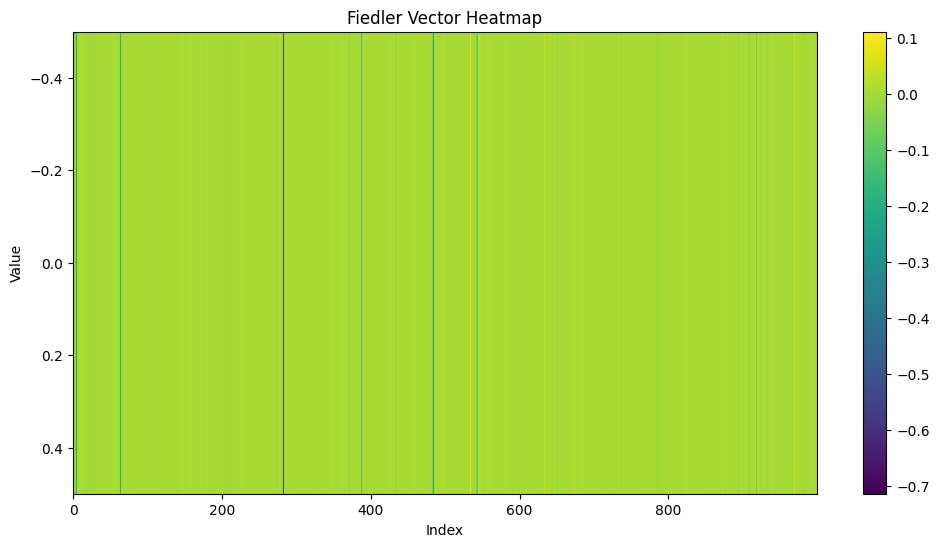

In [5]:
import matplotlib.pyplot as plt

def visualize_vector_heatmap(vector, title="Vector Heatmap"):
    """
    Visualize the given vector using a heatmap.
    """
    plt.figure(figsize=(12, 6))
    plt.imshow([vector], aspect='auto', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.ylabel('Value')
    plt.xlabel('Index')
    plt.show()

# Visualize the Fiedler vector as a heatmap
visualize_vector_heatmap(fiedler_vector, title="Fiedler Vector Heatmap")


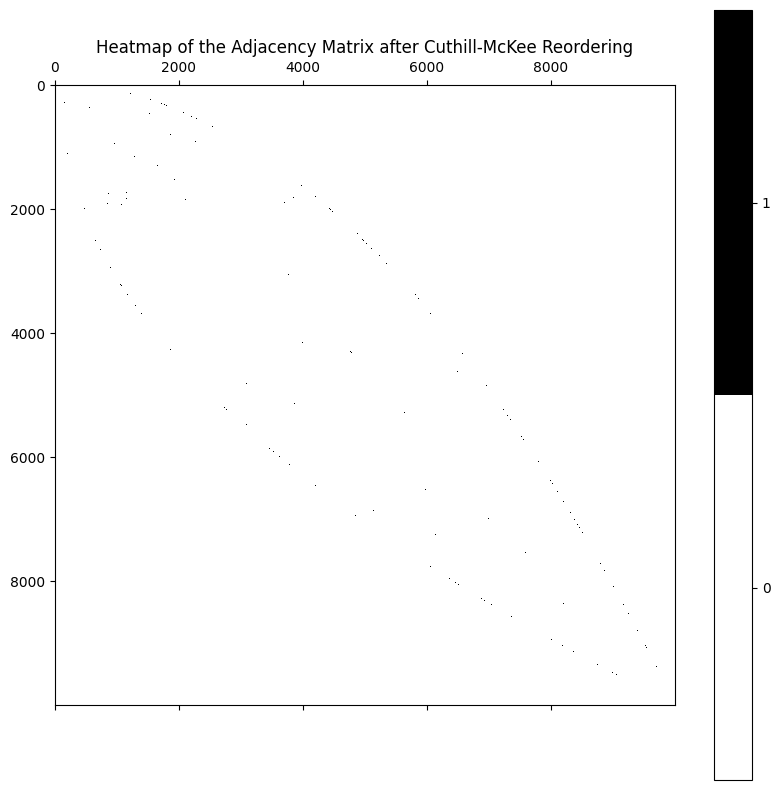

In [22]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.utils import reverse_cuthill_mckee_ordering

# Generating a random graph with 1000 nodes
np.random.seed(0)  # For reproducibility
G = nx.random_regular_graph(3, 10000)

# Applying the Cuthill-McKee algorithm
rcm = list(reverse_cuthill_mckee_ordering(G))
A = nx.adjacency_matrix(G, nodelist=rcm).todense()

# Visualizing the heatmap of the adjacency matrix
plt.figure(figsize=(10, 10))
# plt.matshow(A, cmap='hot', interpolation='nearest')
plt.spy(A)
plt.title("Heatmap of the Adjacency Matrix after Cuthill-McKee Reordering")
plt.colorbar()
plt.show()


In [1]:
import scipy

In [2]:
exp_csr = scipy.sparse.load_npz("/lustre/acslab/shared/Agatha_shared/2021_11_22/ensemble/adj_matrices_abstr_enrich/scipy_csr/aapp_aapp_edgelist.npz")

In [3]:
exp_csr 

<22054433x22054433 sparse matrix of type '<class 'numpy.bool_'>'
	with 561935538 stored elements in Compressed Sparse Row format>

In [4]:
exp_csr[3]

<1x22054433 sparse matrix of type '<class 'numpy.bool_'>'
	with 24 stored elements in Compressed Sparse Row format>

In [5]:
exp_csr[3].nonzero()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0], dtype=int32),
 array([   43653,  2077642,  2824754,  3544050,  4936944,  5520939,
         8316067,  8700937,  9518002, 10285236, 11111418, 13673826,
        14451052, 16597348, 16735984, 17625591, 18161725, 18890346,
        19272552, 19619350, 20054970, 20781561, 20802466, 21591008],
       dtype=int32))

In [6]:
exp_csr[3, 9518002]

True

In [7]:
from scipy.sparse.csgraph import reverse_cuthill_mckee

In [36]:
sub_graph= exp_csr[:1000000,:1000000]

In [37]:
sub_graph

<1000000x1000000 sparse matrix of type '<class 'numpy.bool_'>'
	with 1122262 stored elements in Compressed Sparse Row format>

In [38]:
reverse_subgraph= reverse_cuthill_mckee(sub_graph)

In [39]:
reverse_subgraph

array([809679, 111302, 473395, ..., 578919, 578917, 499999], dtype=int32)

In [40]:
import matplotlib.pyplot as plt

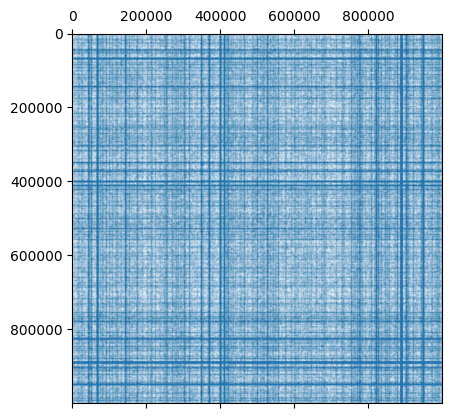

In [47]:
plt.spy(sub_graph,markersize =0.01)

In [42]:
rcm_matrix = sub_graph[reverse_subgraph, :][:, reverse_subgraph]
# plt.spy(reverse_subgraph,markersize=0.1)

In [43]:
rcm_matrix.shape

(1000000, 1000000)

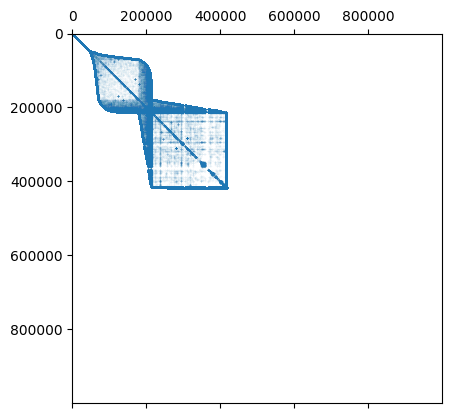

In [48]:
plt.spy(rcm_matrix,markersize=0.01)